In [62]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

In [63]:
x_train = np.array([[4.7], [2.4], [7.5], [7.1], [4.3], [7.8], [8.9], [5.2], [4.59], [2.1], [8], [5], [7.5], [5], [4], [8], [5.2], [4.9], [3], [4.7], [4], [4.8], [3.5], [2.1], [4.1]], dtype=np.float32)

y_train = np.array([[2.6], [1.6], [3.09], [2.4], [2.4], [3.3], [2.6], [1.96], [3.13], [1.76], [3.2], [2.1], [1.6], [2.5], [2.2], [2.75], [2.4], [1.8], [1], [2], [1.6], [2.4], [2.6], [1.5], [3.1]], dtype=np.float32)

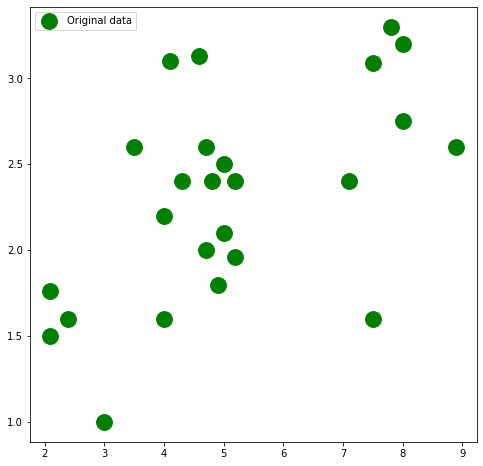

In [64]:
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', s=250, label='Original data')
plt.legend()
plt.show()

In [65]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


In [66]:
input_size = 1
hidden_size = 1
output_size = 1
learning_rate = 0.001

In [67]:
w1 = torch.rand(input_size, hidden_size, requires_grad=True)
w1.shape 

torch.Size([1, 1])

In [68]:
b1 = torch.rand(hidden_size, output_size, requires_grad=True)
b1.shape

torch.Size([1, 1])

In [69]:
w1, b1

(tensor([[0.6218]], requires_grad=True),
 tensor([[0.4643]], requires_grad=True))

In [70]:
alpha = 0.8

In [71]:
for iter in range(1, 5001):
    y_pred = X_train.mm(w1).add(b1)
    ridge_reg_penalty = (w1*w1)
    loss = ((y_pred - Y_train).pow(2).sum()) + (alpha * ridge_reg_penalty)

    if iter % 100 == 0:
        print(iter, loss.item())

    loss.backward()

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        b1 -= learning_rate * b1.grad
        w1.grad.zero_()
        b1.grad.zero_()

100 7.075765132904053
200 6.427018165588379
300 6.230062484741211
400 6.170269966125488
500 6.152117729187012
600 6.1466064453125
700 6.144932270050049
800 6.144424915313721
900 6.144271373748779
1000 6.144224166870117
1100 6.144209384918213
1200 6.144205570220947
1300 6.144203186035156
1400 6.144203186035156
1500 6.1442036628723145
1600 6.1442036628723145
1700 6.1442036628723145
1800 6.1442036628723145
1900 6.144203186035156
2000 6.144202709197998
2100 6.144202709197998
2200 6.144202709197998
2300 6.144202709197998
2400 6.144202709197998
2500 6.144202709197998
2600 6.144202709197998
2700 6.144202709197998
2800 6.144202709197998
2900 6.144202709197998
3000 6.144202709197998
3100 6.144202709197998
3200 6.144202709197998
3300 6.144202709197998
3400 6.144202709197998
3500 6.144202709197998
3600 6.144202709197998
3700 6.144202709197998
3800 6.144202709197998
3900 6.144202709197998
4000 6.144202709197998
4100 6.144202709197998
4200 6.144202709197998
4300 6.144202709197998
4400 6.14420270919

In [72]:
print('w1: ', w1)
print('b1: ', b1)

w1:  tensor([[0.1735]], requires_grad=True)
b1:  tensor([[1.4123]], requires_grad=True)


In [73]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[4.7000],
        [2.4000],
        [7.5000],
        [7.1000],
        [4.3000],
        [7.8000],
        [8.9000],
        [5.2000],
        [4.5900],
        [2.1000],
        [8.0000],
        [5.0000],
        [7.5000],
        [5.0000],
        [4.0000],
        [8.0000],
        [5.2000],
        [4.9000],
        [3.0000],
        [4.7000],
        [4.0000],
        [4.8000],
        [3.5000],
        [2.1000],
        [4.1000]])

In [74]:
predicted_in_tensor = x_train_tensor.mm(w1).add(b1)
predicted_in_tensor

tensor([[2.2280],
        [1.8288],
        [2.7139],
        [2.6445],
        [2.1586],
        [2.7660],
        [2.9569],
        [2.3148],
        [2.2089],
        [1.7768],
        [2.8007],
        [2.2801],
        [2.7139],
        [2.2801],
        [2.1065],
        [2.8007],
        [2.3148],
        [2.2627],
        [1.9330],
        [2.2280],
        [2.1065],
        [2.2454],
        [2.0197],
        [1.7768],
        [2.1239]], grad_fn=<AddBackward0>)

In [75]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[2.2280006],
       [1.8288374],
       [2.7139387],
       [2.644519 ],
       [2.1585813],
       [2.7660036],
       [2.9569077],
       [2.3147755],
       [2.2089105],
       [1.7767726],
       [2.8007135],
       [2.2800655],
       [2.7139387],
       [2.2800655],
       [2.1065164],
       [2.8007135],
       [2.3147755],
       [2.2627106],
       [1.932967 ],
       [2.2280006],
       [2.1065164],
       [2.2453558],
       [2.0197415],
       [1.7767726],
       [2.1238713]], dtype=float32)

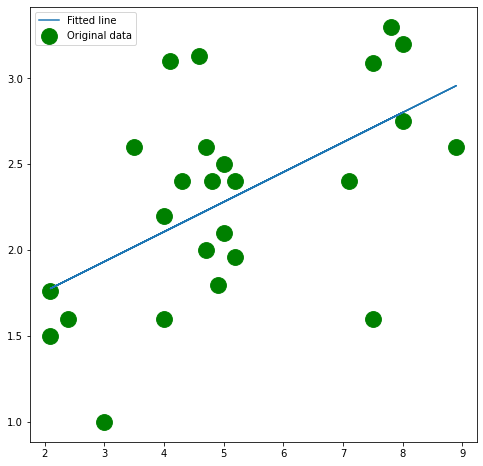

In [76]:
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', s=250, label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show() 

In [77]:
#
# Doing the same training using sklearn
#

In [78]:
ridge_model = Ridge()

In [79]:
ridge_reg = ridge_model.fit(x_train, y_train)

In [80]:
print('w1 with sklearn is: ', ridge_model.coef_ )
print('b1 with sklearn is: ', ridge_model.intercept_)

w1 with sklearn is:  [[0.17317088]]
b1 with sklearn is:  [1.4142637]


In [81]:
predicted = ridge_model.predict(x_train)
predicted

array([[2.2281668],
       [1.8298738],
       [2.7130454],
       [2.643777 ],
       [2.1588986],
       [2.7649965],
       [2.9554844],
       [2.3147523],
       [2.2091181],
       [1.7779225],
       [2.7996306],
       [2.280118 ],
       [2.7130454],
       [2.280118 ],
       [2.1069472],
       [2.7996306],
       [2.3147523],
       [2.2628012],
       [1.9337764],
       [2.2281668],
       [2.1069472],
       [2.2454839],
       [2.020362 ],
       [1.7779225],
       [2.1242642]], dtype=float32)

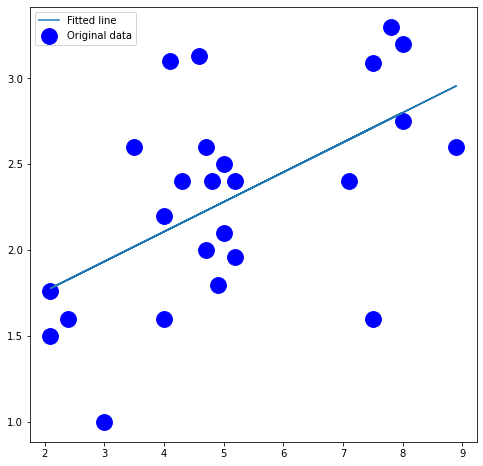

In [82]:
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='blue', s=250, label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()